# Introdução


## Analisando Vendas

In [21]:
import pandas as pd


In [22]:
dfAlucar = pd.read_csv('material curso - Time Series/alucar.csv')
dfAlucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [23]:
dfAlucar.shape

(24, 2)

In [24]:
dfAlucar.isnull().sum().sum()

0

In [25]:
dfAlucar.dtypes

mes       object
vendas     int64
dtype: object

In [26]:
dfAlucar['mes'] = pd.to_datetime(dfAlucar['mes'])

In [27]:
dfAlucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [28]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
sns.set_palette("Accent")
sns.set_style("whitegrid")

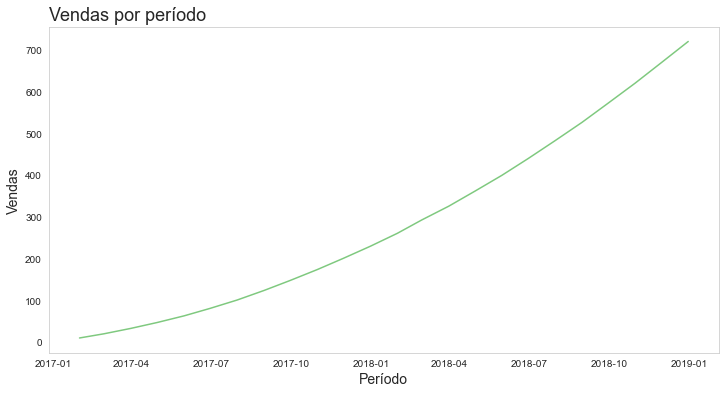

In [30]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='mes', y='vendas', data=dfAlucar, )
ax.set_title("Vendas por período", fontsize = 18, loc='left')
ax.set_ylabel("Vendas", fontsize = 14)
ax.set_xlabel("Período", fontsize = 14)
ax.grid(False)

plt.show()


### Decompondo a Série Temporal

In [31]:
dfAlucar['aumento'] = dfAlucar['vendas'].diff()
dfAlucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [32]:
'''dfAlucar.fillna('0', inplace=True)
dfAlucar.head()'''

"dfAlucar.fillna('0', inplace=True)\ndfAlucar.head()"

In [33]:
dfAlucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [34]:
'''dfAlucar['aumento'] = dfAlucar['aumento'].astype('int64')'''

"dfAlucar['aumento'] = dfAlucar['aumento'].astype('int64')"

In [35]:
def plotar(titulo, labelx, labely, x,y, data):
    plt.figure(figsize=(12,6))
    ax = sns.lineplot(x=x, y=y, data=data)
    ax.set_title(titulo, fontsize = 20,loc='left')
    ax.set_ylabel(labely, fontsize = 14)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.grid(False)
    plt.show()


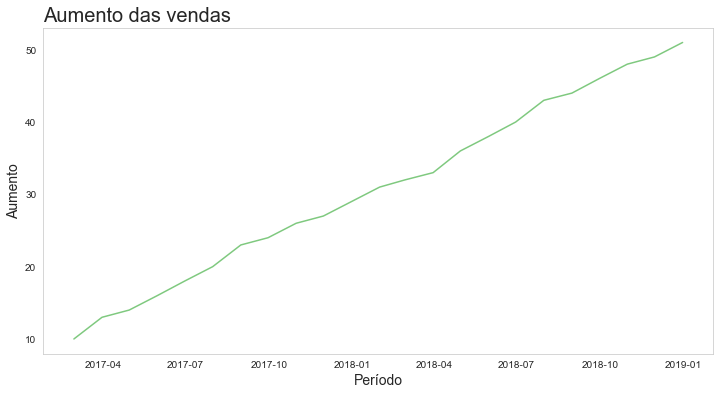

In [36]:
plotar("Aumento das vendas", "Período", "Aumento", "mes", "aumento", dfAlucar)

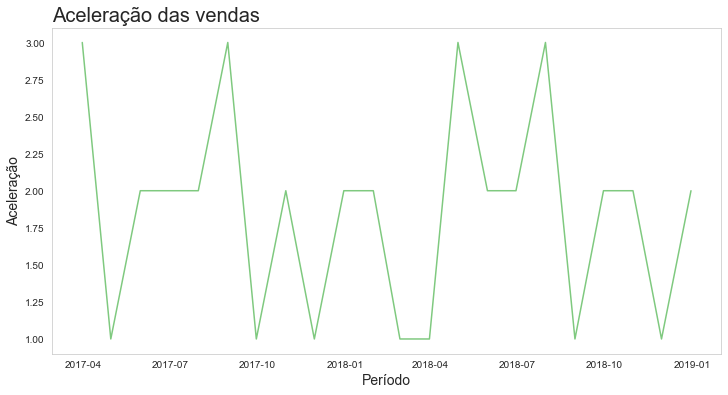

In [37]:
dfAlucar['aceleracao'] = dfAlucar['aumento'].diff()

plotar("Aceleração das vendas", "Período", "Aceleração", "mes", "aceleracao", dfAlucar)

In [38]:
dfAlucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


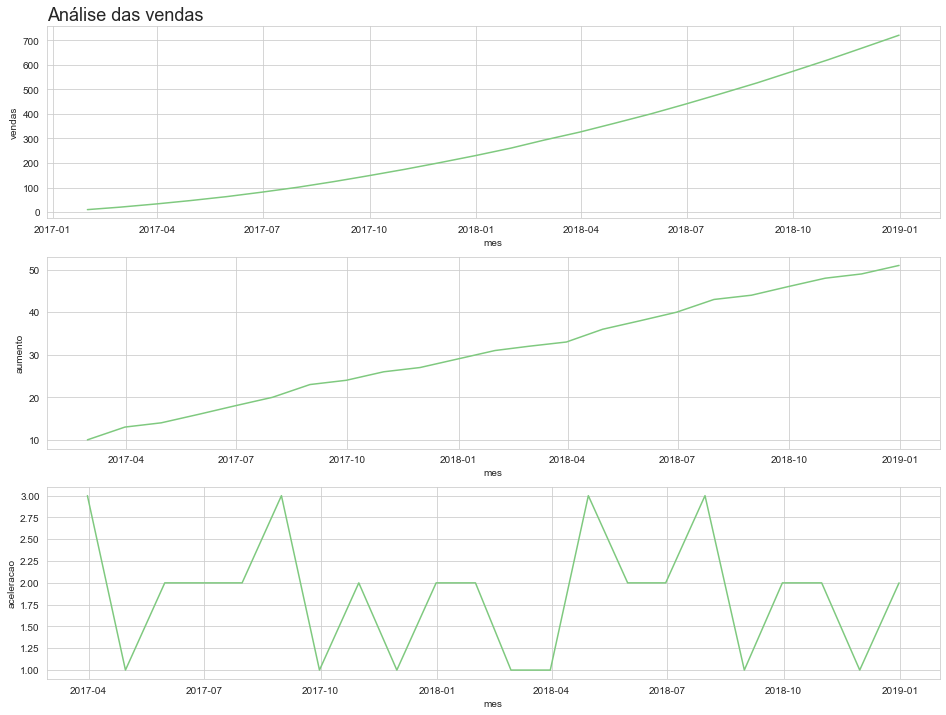

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise das vendas", fontsize = 18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=dfAlucar, ax=ax)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=dfAlucar, ax=ax)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=dfAlucar, ax=ax)

* As vendas estão cresecendo em todo o período analisado.

In [41]:
def plot_comparacao(x, y1,y2,y3, data, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=data, ax=ax)
    ax = plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=data, ax=ax)
    ax = plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y3, data=data, ax=ax)
    plt.show()
    

### Autocorrelação

In [42]:
from pandas.plotting import autocorrelation_plot

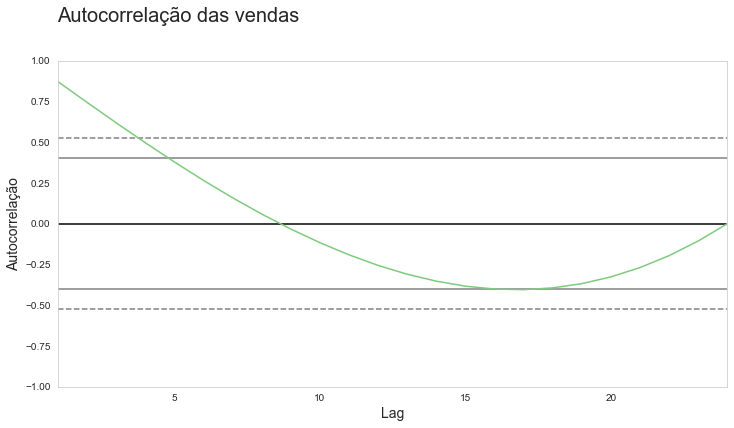

In [59]:
ax = autocorrelation_plot(dfAlucar['vendas'])
ax.figure.set_size_inches(12,6)
ax.set_title("Autocorrelação das vendas", fontsize = 20, x = 0.18, y = 1.1)
ax.set_ylabel("Autocorrelação", fontsize = 14)
ax.set_xlabel("Lag", fontsize = 14)     
plt.show()